In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
import copy

In [2]:
def util(x):
    return(np.log(1 + x))

def prob_t_is_max(max_so_far, t, T):
    coeff = 1.0/(T - t)
    prod = (1.0 - np.power(norm.cdf(max_so_far), T-t))
    return(coeff*prod)

def prob_any_next_t_is_max(max_so_far, t, T):
    prod = (1.0 - np.power(norm.cdf(max_so_far), T-t))
    return(prod)

def opt_util(p_t, pi_cp, xbar=1.0):
    #g(x) = log(1 + x), x in [0,xbar]
    x = (1.0/(pi_cp * p_t)) - 1.0
    if x > xbar:
        x = xbar
    if x < 0:
        x = 0
    return(x)

def log_utility(x):
    y = 2.0*np.log(1 + np.power(x,1/2))
    return(np.sum(y))

def dx_log_utility(x):
    

In [80]:
T = 10
ramp_const = 0.01
system_noise_var = 1.0
x_bar = 1.0
pi_cp = 2.0

max_so_far = 0

for t in range(T):
    p_t = prob_t_is_max(max_so_far, t, T)
    opt = opt_util 
    

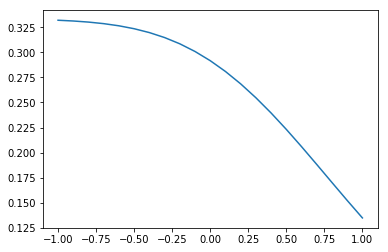

In [94]:
pt = 1.0/3.0*prob_any_next_t_is_max(s_0_init_vals, 0, 3)
plt.plot(s_0_init_vals, pt)
plt.show()

In [87]:
#T = 3

MC = 500
max_s_f = 0
noise_var = 1.0
g = np.arange(0,1.0,0.05)
ramp_const = 0.5
pi_cp = 1.2



s_0_init_vals = np.arange(-1.0,1.1,0.1)
RT_sweep_mean = []
RT_sweep_median = []
#RT_sweep_max = []
#RT_sweep_min = []
sols_sweep = []

for s_0 in s_0_init_vals:
    print(s_0)
    RT_mc = []
    r1_mc = []
    r1s_mc = np.zeros((g.shape[0],g.shape[0],g.shape[0]))
    r2_mc = []
    r3_mc = []
    solutions = []

    for m in range(MC):
        #initialize max_s_f
        max_s_f = s_0

        #if i%100 == 0:
        #    print(i)
        
        #g(x) = log(1 + x)
        #step one
        p = (1.0/3.0)*prob_any_next_t_is_max(max_s_f, 0, 3)
        max_r1 = 0.0
        max_r1_p = [0.0, 0.0, 0.0]
        for i in range(g.shape[0]):
            for j in range(g.shape[0]):
                for k in range(g.shape[0]):
                    point = [g[i], g[j], g[k]]
                    x1 = point[0]
                    x2 = point[1]
                    x3 = point[2]
                    if np.abs(g[i] - g[j]) > ramp_const:
                        pass
                    elif np.abs(g[j] - g[k]) > ramp_const:
                        pass
                    else:
                        if type(r1) == np.ndarray:
                            print("problem")
                            print(m,s,i,j,k)
                        r1 = np.log(1 + x1) + np.log(1 + x2) + np.log(1 + x3) - pi_cp*p*(x1 + x2 + x3)
                        if r1 > max_r1:
                            max_r1 = r1
                            max_r1_p = point
                        r1s_mc[i,j,k] = copy.copy(r1)
        s_1 = np.random.normal(0,1)
        max_s_f = s_1
        #if s_1 > max_s_f:  #do we update no matter what s_1 is or do we keep it at 0?
        #    max_s_f = s_1

        #step two
        x1star = max_r1_p[0]
        p = (1.0/2.0)*prob_any_next_t_is_max(max_s_f, 1, 3)
        max_r2 = 0.0
        max_r2_p = [x1star, 0.0, 0.0]
        for j in range(g.shape[0]):
            for k in range(g.shape[0]):
                point = [x1star, g[j], g[k]]
                x2 = point[1]
                x3 = point[2]
                if np.abs(x1star - g[j]) > ramp_const:
                    pass
                elif np.abs(g[j] - g[k]) > ramp_const:
                    pass
                else:
                    r2 = np.log(1 + x1star) + np.log(1 + x2) + np.log(1 + x3) - pi_cp*((1 - 2*p)*x1star + p*x2 + p*x3)
                    if r2 > max_r2:
                        max_r2 = r2
                        max_r2_p = point
        s_2 = np.random.normal(0,1)
        if s_2 > max_s_f:
            max_s_f = s_2
        r2_mc.append(r2)

        #step three
        x2star = max_r2_p[1]
        plays_so_far = [x1star, x2star]
        max_noise_t = np.argmax([s_1, s_2])
        p = prob_any_next_t_is_max(max_s_f, 2, 3)
        max_r3 = 0.0
        max_r3_p = [x1star, x2star, 0.0]
        for k in range(g.shape[0]):
            point = [x1star, x2star, g[k]]
            x3 = point[2]
            if np.abs(x2star - g[k]) > ramp_const:
                pass
            else:
                r3 = np.log(1 + x1star) + np.log(1 + x2star) + np.log(1 + x3) - pi_cp*((1 - p)*plays_so_far[max_noise_t] + p*x3 )
                if r3 > max_r3:
                    max_r3 = r3
                    max_r3_p = point
        s_3 = np.random.normal(0,1)
        if s_3 > max_s_f:
            max_s_f = s_3
        r3_mc.append(r3)

        x3star = max_r3_p[2]
        plays_so_far.append(x3star)
        s = [s_1, s_2, s_3]
        max_noise_t = np.argmax(s)

        R = np.log(1 + x1star) + np.log(1 + x2star) + np.log(1 + x3star) - pi_cp*(plays_so_far[max_noise_t])
        RT_mc.append(R)
        solutions.append([x1star, x2star, x3star])
    
    RT_sweep_mean.append(np.mean(RT_mc))
    RT_sweep_median.append(np.median(RT_mc))
    sols_sweep.append(solutions)
    #RT_sweep_max.append(np.max(RT_mc))
    #RT_sweep_min.append(np.min(RT_mc))



-1.0
-0.9
-0.8
-0.7000000000000001
-0.6000000000000001
-0.5000000000000001
-0.40000000000000013
-0.30000000000000016
-0.20000000000000018
-0.1000000000000002
-2.220446049250313e-16
0.09999999999999964
0.19999999999999973
0.2999999999999998
0.3999999999999997
0.49999999999999956
0.5999999999999996
0.6999999999999997
0.7999999999999996
0.8999999999999995
0.9999999999999996


In [88]:
xb = 0.0
best_case = 2*np.log(2) + np.log(1 + xb) - pi_cp*xb
print(best_case)

1.3862943611198906


In [89]:
fixed = 1.0
fixed_case = 3*np.log(1 + fixed) - pi_cp*fixed
print(fixed_case)

0.8794415416798358


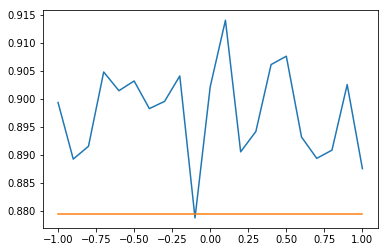

In [90]:
plt.plot(s_0_init_vals,RT_sweep_mean)
plt.plot(s_0_init_vals,[fixed_case for i in range(s_0_init_vals.shape[0])])
#plt.plot(s_0_init_vals,[best_case for i in range(s_0_init_vals.shape[0])])
#plt.ylim(0.6,1.5)
plt.show()

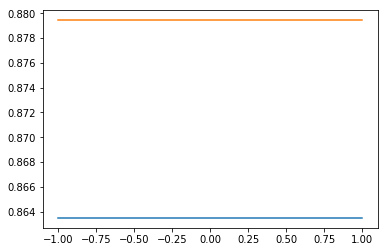

In [91]:
plt.plot(s_0_init_vals,RT_sweep_median)
plt.plot(s_0_init_vals,[fixed_case for i in range(s_0_init_vals.shape[0])])
#plt.plot(s_0_init_vals,[best_case for i in range(s_0_init_vals.shape[0])])
#plt.ylim(0.6,1.5)
plt.show()

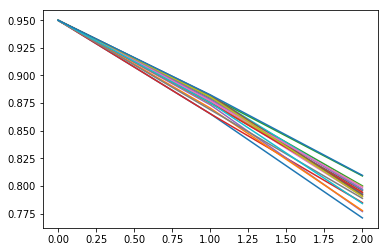

In [92]:
average_sols = []

for sol in sols_sweep:
    s = np.mean(np.asarray(sol), axis=0)
    average_sols.append(s)
    
plt.plot(np.asarray(average_sols).T)
plt.show()

In [10]:
np.min(RT_mc)

0.1683666028633033

In [11]:
np.max(RT_mc)

1.1672223015837941

In [12]:
np.mean(RT_mc)

0.9037312890424468

In [13]:
np.median(RT_mc)

0.8634881177269667

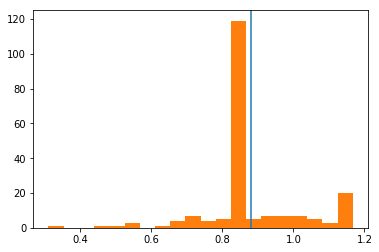

In [68]:
plt.hist(RT_mc, bins=20)
plt.axvline(fixed_case)
plt.show()

In [15]:
sols = np.asarray(solutions)

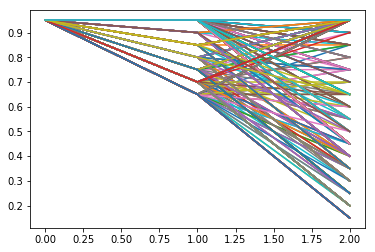

In [65]:
plt.plot(sols.T)
plt.show()

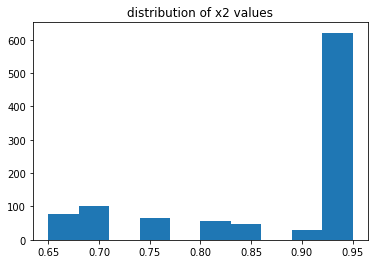

In [17]:
plt.hist(sols[:,1])
plt.title("distribution of x2 values")
plt.show()

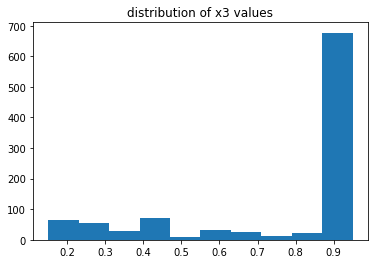

In [18]:
plt.hist(sols[:,2])
plt.title("distribution of x3 values")
plt.show()

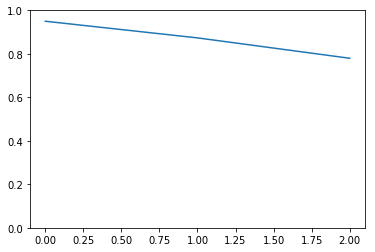

In [19]:
plt.plot(np.mean(sols, axis=0))
plt.ylim(0,1)
plt.show()

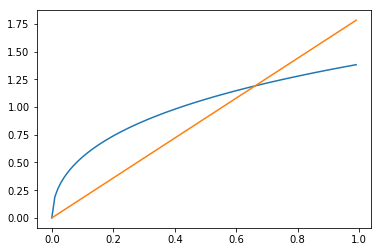

In [13]:
#comparing utility and pi_cp at 1 time step
#want CP cost to outweight utility of single round

pi_cp = 1.8

x = np.arange(0,1,0.01)
plt.plot(x, 2.0*np.log(1 + np.power(x,1/2)))
plt.plot(x, pi_cp*x)
plt.show()

In [282]:
#two step simulation, everything is independent

max_s_f = 0
noise_var = 1.0
ramp_const = 0.3
pi_cp = 1.2
x_bar = 1.0

g = np.arange(0,1,0.01)
MC_rounds = 100
MC_R = np.zeros((g.shape[0],g.shape[0]))


for i in range(g.shape[0]):
    #print(i)
    x_1 = g[i]
    for j in range(g.shape[0]):
        x_2 = g[j]
        if np.abs(x_1 - x_2) >= ramp_const:
            pass
        else:
            R_s = 0.0
            for mc in range(MC_rounds):
                s_1 = np.random.normal(0,noise_var)
                s_2 = np.random.normal(0,noise_var)
                cp_i = np.argmax(np.array([s_1, s_2]))
                plays = np.array([x_1, x_2])

                R_s += log_utility(plays) - pi_cp*plays[cp_i]
            MC_R[i,j] = R_s/float(MC_rounds)



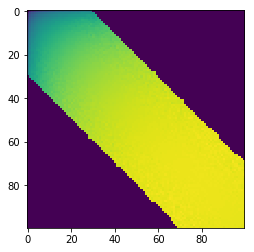

1.6407855106544957


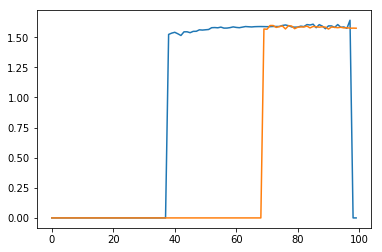

In [283]:
plt.imshow(MC_R)
plt.show()

print(np.max(MC_R))
argimax = np.unravel_index(np.argmax(MC_R), MC_R.shape)

plt.plot(MC_R[argimax[0],:])
plt.plot(MC_R[-1,:])
plt.show()

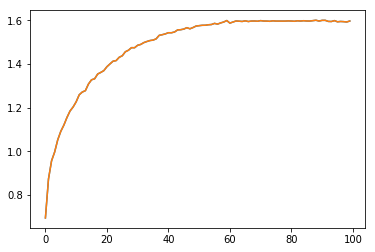

In [250]:
plt.plot(np.max(MC_R,axis=0))
plt.show()

In [257]:
g[73]

0.73

In [275]:
#set x_1
#set s_1

x_1 = x_bar - ramp_const
s_1 = 0.0

x_2_sims = []
g_vals = []



for j in range(g.shape[0]):
    x_2 = g[j]
    if np.abs(x_1 - x_2) >= ramp_const:
        pass
    else:
        g_vals.append(x_2)
        R_s = []
        for mc in range(MC_rounds):
            s_2 = np.random.normal(0, noise_var)
            cp_i = np.argmax(np.array([s_1, s_2]))
            plays = np.array([x_1, x_2])
            
            R_s.append(log_utility(plays) - pi_cp*plays[cp_i])
        x_2_sims.append(R_s)
        

In [276]:
sim_data = np.asarray(x_2_sims)
sim_data.shape

(56, 100000)

In [277]:
len(g_vals)

56

In [278]:
np.max(sim_data)

1.7403982974098038

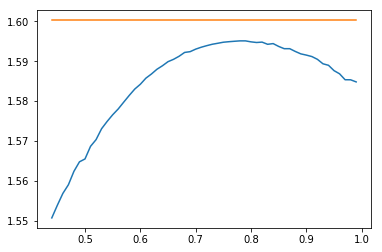

In [279]:
#not independent of any noise on the first round

means = []
medians = []
for i in range(sim_data.shape[0]):
    means.append(np.mean(sim_data[i,:])) 
    medians.append(np.median(sim_data[i,:]))
    
plt.plot(g_vals, means)
#plt.plot(g_vals, medians)
plt.plot(g_vals, [np.max(MC_R) for i in range(len(g_vals))])
plt.show()

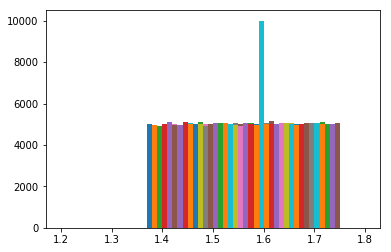

In [274]:
for i in range(sim_data.shape[0]):
    xbins = np.arange(1.2,1.8,0.01)
    plt.hist(sim_data[i,:], label=str(g_vals[i]), bins=xbins)
#plt.legend()
plt.show()

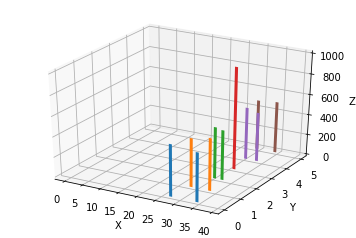

In [183]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xbins = np.arange(0,2,0.05)
#for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
for i in range(sim_data.shape[0]):
    #s = #np.random.normal(loc=10, scale=10, size=2000)

    hist, bins = np.histogram(sim_data[i,:], bins=xbins)
    xs = (bins[:-1] + bins[1:])/0.1

    #ax.bar(xs, hist, zs=i, zdir='y', ec=c, alpha=0.8)
    ax.bar(xs, hist, zs=i, zdir='y', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [159]:
xs = (bins[:-1] + bins[1:])/0.1
print(xs)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5]


In [137]:
hist

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 82,  0,  0,  0,  0,  0,
        0, 18,  0,  0,  0])

In [359]:
#set x_1
x_1 = x_bar - ramp_const
#g = np.arange(x_bar - ramp_const - 0.01,x_bar - ramp_const + 0.01 ,0.005)
g = np.arange(0,1,0.01)
s_1_vals = np.arange(-2.0,2.0,0.1) #98% of observable initial noise values

grid_MC = np.zeros((g.shape[0], s_1_vals.shape[0], g.shape[0]))

x_2_sims = []
g_vals = []

MC_rounds = 100

for i in range(g.shape[0]):
    if i % 10 == 0:
        print(i)
    #for all initial values
    x_1 = g[i]
    for k in range(s_1_vals.shape[0]):
        #for all observable initial noises
        s_1 = s_1_vals[k]
        for j in range(g.shape[0]):
            #simulate permissable x_2 values
            x_2 = g[j]
            if np.abs(x_1 - x_2) >= ramp_const:
                pass
            else:
                R_s = []
                for mc in range(MC_rounds):
                    s_2 = np.random.normal(0, noise_var)
                    cp_i = np.argmax(np.array([s_1, s_2]))
                    plays = np.array([x_1, x_2])
                    
                    R_s.append(log_utility(plays) - pi_cp*plays[cp_i])
                grid_MC[i,k,j] = np.mean(R_s)



0
10
20
30
40
50
60
70
80
90


In [360]:
grid_MC.shape

(100, 40, 100)

In [361]:
argimax = np.unravel_index(np.argmax(grid_MC), grid_MC.shape)
argimax

(97, 0, 67)

In [439]:
#maximum mean slice
max_xi = 0
m_run = 0

for i in range(grid_MC.shape[0]):
    mean_en = np.mean(grid_MC[i,:,:])
    if mean_en > m_run:
        m_run = mean_en
        max_xi = i
        
print(g[max_xi])

0.6900000000000001


In [440]:
#max mean trajectory through slice
max_xi = 0
m_run = 0

for i in range(grid_MC.shape[0]):
    mean_max_trajectory = np.mean(np.max(grid_MC[i,:,:],axis=1))
    if mean_max_trajectory > m_run:
        m_run = mean_max_trajectory
        max_xi = i
        
print(g[max_xi])
    

0.6900000000000001


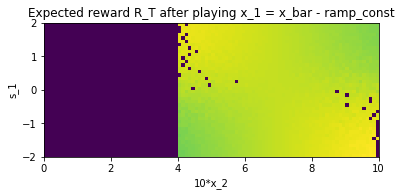

In [363]:
plot_copy = copy.copy(grid_MC[max_xi,:,:])

for i in range(plot_copy.shape[0]):
    max_j = np.argmax(plot_copy[i,:])
    plot_copy[i,max_j] = 0

plt.imshow(plot_copy, interpolation=None, extent=[0,10,-2,2])
plt.xlabel("10*x_2")
plt.ylabel("s_1")
plt.title("Expected reward R_T after playing x_1 = x_bar - ramp_const")
plt.show()

In [435]:
y = np.argmax(grid_MC[max_xi,:,:],axis=1)

In [436]:
def logist(L_max, L_min, k, x_0, x):
    return((L_max/(1 + np.exp(-k * (x - x_0)))) + L_min)

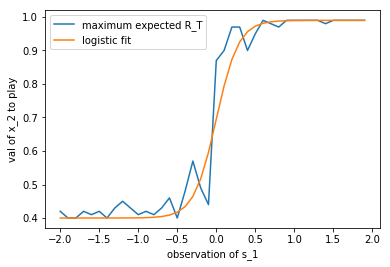

In [437]:
plt.plot(s_1_vals,g[y], label="maximum expected R_T")
plt.plot(s_1_vals,logist(0.59, 0.4, 7, 0, np.arange(-2,2,0.1)), label="logistic fit")
plt.ylabel("val of x_2 to play")
plt.xlabel("observation of s_1")
plt.legend()
plt.show()

In [9]:
#grid search for T = 3

max_s_f = 0
noise_var = 1.0
ramp_const = 0.3
pi_cp = 1.2
x_bar = 1.0
g = np.arange(0,1,0.1)
s_vals = np.arange(-2.0,2.0,0.1) #98% of observable initial noise values

grid_MC = np.zeros((g.shape[0], s_vals.shape[0], g.shape[0], s_vals.shape[0], g.shape[0]))


MC_rounds = 10

for i in range(g.shape[0]):
    if i % 1 == 0:
        print(str(i) + ": " + str(g[i]))
    x_1 = g[i]
    for j in range(s_vals.shape[0]):
        s_1 = s_vals[j]
        for k in range(g.shape[0]):
            x_2 = g[k]
            if np.abs(x_1 - x_2) > ramp_const:
                pass
            else:
                for l in range(s_vals.shape[0]):
                    s_2 = s_vals[l]
                    for m in range(g.shape[0]):
                        x_3 = g[m]
                        if np.abs(x_2 - x_3) > ramp_const:
                            pass
                        else:
                            R_s = []
                            for mc in range(MC_rounds):
                                s_3 = np.random.normal(0, noise_var)
                                cp_i = np.argmax(np.array([s_1, s_2, s_3]))
                                plays = np.array([x_1, x_2, x_3])

                                R_s.append(log_utility(plays) - pi_cp*plays[cp_i])
                            grid_MC[i,j,k,l,m] = np.mean(R_s)

0: 0.0
1: 0.1
2: 0.2
3: 0.30000000000000004
4: 0.4
5: 0.5
6: 0.6000000000000001
7: 0.7000000000000001
8: 0.8
9: 0.9


In [12]:
np.max(grid_MC)

3.095761987961581

In [17]:
#maximum mean slice
max_xi = 0
m_run = 0

for i in range(grid_MC.shape[0]):
    for k in range(grid_MC.shape[2]):
        noise_outcomes = grid_MC[i,:,k,:,:] #all choices of x_3 w.r.t. s_1, s_2
        mean_en = np.mean(grid_MC[i,:,k,:,:])
        if mean_en > m_run:
            m_run = mean_en
            max_xij = (i,k)
        
print(g[i],g[k])
print(np.mean(grid_MC[i,:,k,:,:]))

0.9 0.9
1.1561442242521673


In [16]:
#maximum median slice
max_xi = 0
m_run = 0

for i in range(grid_MC.shape[0]):
    for k in range(grid_MC.shape[2]):
        noise_outcomes = grid_MC[i,:,k,:,:] #all choices of x_3 w.r.t. s_1, s_2
        mean_en = np.median(grid_MC[i,:,k,:,:])
        if mean_en > m_run:
            m_run = mean_en
            max_xij = (i,k)
        
print(g[i],g[k])

0.9 0.9


In [18]:
argimax = np.unravel_index(np.argmax(grid_MC), grid_MC.shape)


(40,)

In [19]:
g.shape

(10,)

In [54]:
#grid search up to T rounds

noise_var = 1.0
ramp_const = 0.3
pi_cp = 1.2
x_bar = 1.0
g = np.arange(0,1,0.1)
s_vals = np.arange(-2.0,2.0,0.1) #98% of observable initial noise values

MC_rounds = 10
T = 4
grid_search_shape = []
passed_vals = 0

for t in range(T):
    grid_search_shape += [ g.shape[0], s_vals.shape[0] ]


grid_MC = np.zeros(grid_search_shape[0:-1])
index_size = grid_MC.size
prog_step = int(index_size/10)

for i in range(grid_MC.size):
    if i % prog_step == 0:
        print(str(i/index_size) + "% complete")
    curr_i = np.unravel_index(i, grid_MC.shape)
    plays = []
    noises = []
    flag = "valid"
    for k in range(len(curr_i)):
        if k%2 == 0:
            ki = curr_i[k]
            plays.append(g[ki])
        else:
            ki = curr_i[k]
            noises.append(s_vals[ki])
        #check all play gaps
        for p in range(len(plays)-1):
            if np.abs(plays[p] - plays[p+1]) > ramp_const:
                flag = "pass"
    #check if current path violates constraints
    if flag == "pass":
        passed_vals += 1
        pass
    else: #do the monte carlo
        R_s = []
        for mc in range(MC_rounds):
            noises_s = copy.copy(noises)
            s_T = np.random.normal(0,noise_var)
            noises_s.append(s_T)
            cp_i = np.argmax(np.array(noises_s))
            
            R_s.append(log_utility(plays) - pi_cp*plays[cp_i])
        grid_MC[curr_i] = np.mean(R_s)


0.0% complete
0.1% complete
0.2% complete
0.3% complete
0.4% complete
0.5% complete
0.6% complete
0.7% complete
0.8% complete
0.9% complete


In [57]:
np.savetxt("/home/chase/projects/peakload/notebooks/t4_grid_search.txt", grid_MC.shape, delimiter=",")

In [58]:
#compare k = 4, k = 3, k = 2, naive expected reward for T = 10

naive = 10*log_utility(1) - 1.2
print(naive)

s_so_far = []
x_so_far = []

T = 4

for t in range(T):
    #given noise observations, play x_i = x_1 in grid such that horizon is maximized
    

12.662943611198907


In [ ]:
def max_expected_path():
    return(path)

In [ ]:
#maximum mean slice
max_xi = 0
m_run = 0

for i in range(grid_MC.shape[0]):
    for k in range(grid_MC.shape[2]):
        noise_outcomes = grid_MC[i,:,k,:,:] #all choices of x_3 w.r.t. s_1, s_2
        mean_en = np.mean(grid_MC[i,:,k,:,:])
        if mean_en > m_run:
            m_run = mean_en
            max_xij = (i,k)
        
print(g[i],g[k])
print(np.mean(grid_MC[i,:,k,:,:]))